<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/week6/ex3MobileRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=332aa96116bd5446b3ca84af458a128ff19b4a3f6bf20a1f13c07432b0159e21
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


-170.00000000000003
3.3437305212240013e-16


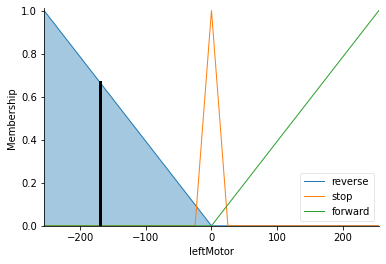

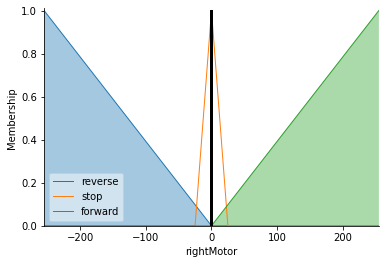

In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

front = ctrl.Antecedent(np.arange(0, 256, 1), 'front')
left = ctrl.Antecedent(np.arange(0, 256, 1), 'left')
right = ctrl.Antecedent(np.arange(0, 256, 1), 'right')
backLeft = ctrl.Antecedent(np.arange(0, 256, 1), 'backLeft')
backRight = ctrl.Antecedent(np.arange(0, 256, 1), 'backRight')

leftMotor = ctrl.Consequent(np.arange(-255, 256, 1), 'leftMotor')
rightMotor = ctrl.Consequent(np.arange(-255, 256, 1), 'rightMotor')

front['veryClose'] = fuzz.trimf(front.universe, [0, 0, 75])
front['close'] = fuzz.trimf(front.universe, [50, 100, 150])
front['moderate'] = fuzz.trimf(front.universe, [125, 175, 225])
front['far'] = fuzz.trimf(front.universe, [200, 250, 255])
front['veryFar'] = fuzz.trimf(front.universe, [225, 255, 255])

left['veryClose'] = fuzz.trimf(left.universe, [0, 0, 75])
left['close'] = fuzz.trimf(left.universe, [50, 100, 150])
left['moderate'] = fuzz.trimf(left.universe, [125, 175, 225])
left['far'] = fuzz.trimf(left.universe, [200, 250, 255])
left['veryFar'] = fuzz.trimf(left.universe, [225, 255, 255])

right['veryClose'] = fuzz.trimf(right.universe, [0, 0, 75])
right['close'] = fuzz.trimf(right.universe, [50, 100, 150])
right['moderate'] = fuzz.trimf(right.universe, [125, 175, 225])
right['far'] = fuzz.trimf(right.universe, [200, 250, 255])
right['veryFar'] = fuzz.trimf(right.universe, [225, 255, 255])

backLeft['veryClose'] = fuzz.trimf(backLeft.universe, [0, 0, 75])
backLeft['close'] = fuzz.trimf(backLeft.universe, [50, 100, 150])
backLeft['moderate'] = fuzz.trimf(backLeft.universe, [125, 175, 225])
backLeft['far'] = fuzz.trimf(backLeft.universe, [200, 250, 255])
backLeft['veryFar'] = fuzz.trimf(backLeft.universe, [225, 255, 255])

backRight['veryClose'] = fuzz.trimf(backRight.universe, [0, 0, 75])
backRight['close'] = fuzz.trimf(backRight.universe, [50, 100, 150])
backRight['moderate'] = fuzz.trimf(backRight.universe, [125, 175, 225])
backRight['far'] = fuzz.trimf(backRight.universe, [200, 250, 255])
backRight['veryFar'] = fuzz.trimf(backRight.universe, [225, 255, 255])

leftMotor['reverse'] = fuzz.trimf(leftMotor.universe, [-255, -255, 0])
leftMotor['stop'] = fuzz.trimf(leftMotor.universe, [-25, 0, 25])
leftMotor['forward'] = fuzz.trimf(leftMotor.universe, [0, 255, 255])

rightMotor['reverse'] = fuzz.trimf(rightMotor.universe, [-255, -255, 0])
rightMotor['stop'] = fuzz.trimf(rightMotor.universe, [-25, 0, 25])
rightMotor['forward'] = fuzz.trimf(rightMotor.universe, [0, 255, 255])

rule1 = ctrl.Rule(front['veryClose'] | front['close'] | front['moderate'], 
                  (leftMotor['reverse'], rightMotor['forward']))
rule2 = ctrl.Rule(front['veryClose'] | front['close'] | front['moderate'] | front['far'] | front['veryFar'], 
                  (leftMotor['reverse'], rightMotor['reverse']))
rule3 = ctrl.Rule(front['far'] | front['moderate'] | front['veryFar'], 
                  (leftMotor['forward'], rightMotor['reverse']))
rule4 = ctrl.Rule(left['close'] & right['far'] & backLeft['far'] & backRight['far'], 
                  (leftMotor['forward'], rightMotor['reverse']))

rule = []
for i in range(1, 5):
    rule.append(locals()["rule" + str(i)])

motorCtrl = ctrl.ControlSystem(rule)
motorSimu = ctrl.ControlSystemSimulation(motorCtrl)

motorSimu.input['front'] = 100
motorSimu.input['left'] = 50
motorSimu.input['right'] = 50
motorSimu.input['backLeft'] = 30
motorSimu.input['backRight'] = 30

motorSimu.compute()
print(str(motorSimu.output['leftMotor']) + "\n" + str(motorSimu.output['rightMotor']))
leftMotor.view(sim = motorSimu)
rightMotor.view(sim = motorSimu)
plt.show()